In [1]:
#import sissopp
from sissopp.py_interface import get_fs_solver
import json
import os
from sympy import symbols, simplify, sin, expand
from pysr import PySRRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
x = np.linspace(-1, 1, 500)
y = np.cos(x)

# Save to CSV in a format SISSO++ expects
df = pd.DataFrame({"sample_id": [f"s{i+1}" for i in range(len(x))], 'f1': x, 'target': y})
df.to_csv("/home/paolo/Thesis/Test_SISSO/data/cosine_data.csv", index=False)

In [3]:
data_file = "/home/paolo/Thesis/Test_SISSO/data/cosine_data.csv"

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

In [4]:
# Try the fit with the exact functional form
cos_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 10,
     'max_rung': 2,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-05,
     'max_abs_feat_val': 1e8,
     'n_residual': 10,
     'n_models_store': 2,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', 'div', 'cos', 'sin', 'sqrt', 'sq']
}
json.dump(cos_json, open("/home/paolo/Thesis/Test_SISSO/data/cos.json", "w"), indent=4)

In [2]:
# Bash
# /home/paolo/sissopp/bin/sisso++ /home/paolo/Thesis/Test_SISSO/data/cos.json

In [24]:
# Try the fit without the cosine but with the sine fucntion
cos_sin_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 10,
     'max_rung': 3,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-05,
     'max_abs_feat_val': 1e8,
     'n_residual': 10,
     'n_models_store': 1,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', 'div', 'sin']
}
json.dump(cos_sin_json, open("/home/paolo/Thesis/Test_SISSO/data/cos_sin.json", "w"), indent=4)

In [27]:
f1 = symbols('x')
c0 = 9.999335689277928e-01
a0 = -2.497423989462255e-01
# Build the expression
expr = c0 + a0 * (sin(f1) + f1)*f1

# Optionally simplify (optional)
simplify(expr)

-0.249742398946225*x*(x + sin(x)) + 0.999933568927793

Roughly coincides with the Taylor expansion of cosine up to second order.

In [41]:
# Try the fit without the cosine but with only +,-,*,/
cos_taylor_json = {
    'data_file': data_file,
     'property_key': 'target',
     'desc_dim': 1,
     'n_sis_select': 20,
     'max_rung': 5,
     'calc_type': 'regression',
     'min_abs_feat_val': 1e-02,
     'max_abs_feat_val': 1e5,
     'n_residual': 10,
     'n_models_store': 1,
     'leave_out_frac': 0.0,
     'leave_out_inds': [],
     'opset': ['add', 'sub', 'mult', "sq"]
}
json.dump(cos_taylor_json, open("/home/paolo/Thesis/Test_SISSO/data/cos_taylor.json", "w"), indent=4)

In [18]:
f1 = symbols('x')
c0 = 9.965315976421334e-01
a0 = -4.651279827944478e-01
# Build the expression
expr = c0 + a0 * (f1**2)

# Optionally simplify (optional)
simplify(expr)

0.996531597642133 - 0.465127982794448*x**2

In [9]:
model = PySRRegressor(
    niterations=300,
    populations=30,
    binary_operators=["+", "*"],
    #maxsize = 20
)
model.fit(x.reshape(-1, 1), y)

/home/paolo/.conda/envs/sissopp_env/lib/python3.9/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.920e+05
Progress: 1188 / 9000 total iterations (13.200%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.939e-02  0.000e+00  y = 0.84084
7           9.344e-06  1.273e+00  y = ((x₀ * -0.46513) * x₀) + 0.99653
9           9.344e-06  6.258e-07  y = ((x₀ * (x₀ * -0.59602)) + 1.277) * 0.78039
11          9.344e-06  4.768e-07  y = (((x₀ * -0.82823) * (x₀ * 0.56851)) + 1.0088) * 0.9878...
                                      3
13          6.815e-10  4.763e+00  y = (((x₀ * (x₀ * 0.039801)) + -0.49938) * (x₀ * x₀)) + 0....
                                      99997
15          6.815e-10  3.576e-07  y = (x₀ * ((x₀ * ((x₀ * 0.039801) * x₀)) + (x₀ * -0.49938)...
                                      )) + 0.99997
25          2.763e-14  1.011e+00  y = (((

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                         0.84084123   
	1         1.272998e+00              ((x0 * x0) * -0.46512556) + 0.9965305   
	2         1.177223e-06  (((x0 * x0) * -0.21118377) + 0.45245895) * 2.2...   
	3         3.027659e-03  ((((x0 * x0) * -0.00943471) + 55.63631) * 49.2...   
	4         4.759956e+00  (((x0 * (x0 * 0.039800644)) + -0.49937898) * (...   
	5         3.668440e-07  (x0 * ((x0 * ((x0 * 0.039800685) * x0)) + (x0 ...   
	6         1.698730e-03  ((x0 * ((x0 * x0) * (x0 * 0.039800614))) + 0.9...   
	7         2.239847e-03  (((x0 * x0) * ((x0 * x0) * 0.039800614)) + 16....   
	8   >>>>  5.272305e+00  ((x0 * (((((x0 * x0) * (x0 * -0.032205667)) + ...   
	9         8.552627e-02  ((x0 * ((((x0 + (x0 * ((x0 * (x0 * -0.03238303...   
	10        2.624509e-02  (((x0 * ((x0 * (((x0 * ((x0 * (x0 * -0.0323830...   
	
	            loss  complexity  
	0   1.939415e-02           1  
	1   9.344034e-06           7  
	2   9.344012e-06           9  
	3   9.287602e-06          11  
	4   6.814888e-10          13  
	5   6.814883e-10          15  
	6   6.791769e-10          17  
	7   6.761412e-10          19  
	8   1.780620e-14          21  
	9   1.500666e-14          23  
	10  1.423928e-14          25  
]

  - outputs/20251006_121803_0kDXSo/hall_of_fame.csv


In [10]:
model.sympy()

x0*x0*((x0*x0*x0*(-0.032205667) + x0)*x0*0.041637037 - 0.49999398) + 0.9999998

In [11]:
# Define the symbolic variable
x0 = symbols('x0')

# Build each part of the expression
expr = (simplify(model.sympy()))

# Optionally simplify or expand the expression
expanded_expr = expand(expr)
expanded_expr

-0.00134094854848868*x0**6 + 0.041637037*x0**4 - 0.49999398*x0**2 + 0.9999998

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
pysr_target = -0.001340948548488688 * x**6 + 0.041637037 * x**4 - 0.499993082 * x**2 + 0.9999998
sissopp_target = 9.965315976421334e-01 + -4.651279827944478e-01 * (x**2)
sissopp_rung5 = 0.0571277941592434 * x**4 - 0.5141501474331906 * x**2 + 1.001420544468147

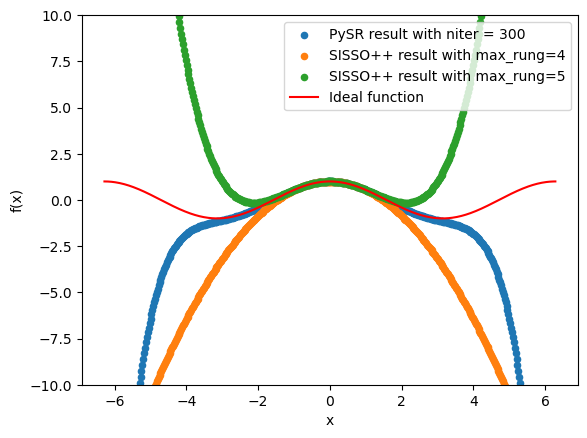

In [5]:
plt.scatter(x, pysr_target, s = 20, label = 'PySR result with niter = 300')
plt.scatter(x, sissopp_target, s = 20, label = 'SISSO++ result with max_rung=4')
plt.scatter(x, sissopp_rung5, s = 20, label = 'SISSO++ result with max_rung=5')
plt.plot(x, np.cos(x), color='r', label = 'Ideal function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim([-10, 10])
plt.legend()
plt.show()